# Listing 5.4 Copying images to training, validation, and test directories , book_pg#131, pdf_pg#154

In [1]:
import os, shutil

In [2]:
original_dataset_dir = r'E:\EDUCATION\Python\Saylani-AI and DS\Assignments\cats-vs-dogs\kaggle_original_data'

In [3]:
base_dir = r'E:\EDUCATION\Python\Saylani-AI and DS\Assignments\cats-vs-dogs\cats_and_dogs_small'
os.mkdir(base_dir)

## Creating 3 directories of 'train', 'validation', 'test'  inside base_dir

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

## Creating directories of "cats", "dogs" inside each "train", "validation", "test" directories

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [6]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [7]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

## Copying images from 'kaggle_original_data' to 'cats_and_dogs_small'

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [15]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [16]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [17]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [18]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [19]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# Listing 5.5 Instantiating a small convnet for dogs vs. cats classification

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Listing 5.6 Configuring the model for training

In [22]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Listing 5.7 Using ImageDataGenerator to read images from directories

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Listing 5.8 Fitting the model using a batch generator

In [25]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 165s 2s/step - loss: 0.6898 - acc: 0.5295 - val_loss: 0.6765 - val_acc: 0.6000
Epoch 2/30
100/100 [==============================] - 166s 2s/step - loss: 0.6582 - acc: 0.6110 - val_loss: 0.6350 - val_acc: 0.6630
Epoch 3/30
100/100 [==============================] - 165s 2s/step - loss: 0.6095 - acc: 0.6675 - val_loss: 0.6321 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 165s 2s/step - loss: 0.5650 - acc: 0.7130 - val_loss: 0.6312 - val_acc: 0.6280
Epoch 5/30
100/100 [==============================] - 165s 2s/step - loss: 0.5356 - acc: 0.7305 - val_loss: 0.5872 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 165s 2s/step - loss: 0.5128 - acc: 0.7475 - val_loss: 0.5737 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 165s 2s/step - loss: 0.4890 - acc: 0.7650 - val_loss: 0.5583 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 164s 2s/step - 

# Listing 5.9 Saving the model

In [26]:
model.save('cats_and_dogs_small_1.h5')

# Listing 5.10 Displaying curves of loss and accuracy during training

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 432x288 with 0 Axes>

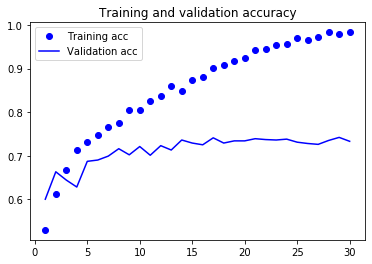

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

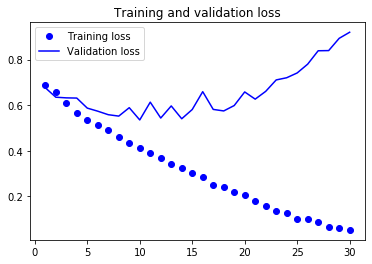

In [29]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()